In [30]:
#instalación de librerías

#!pip install pandas
#!pip install scikit-learn
#!pip install numpy
#!pip install matplotlib

In [31]:
#Correr las librerías
import pandas as pd 
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [32]:
#Importar archivos 
aplicaciones = pd.read_csv('Aplicaciones.csv')

In [33]:
#EDA 
aplicaciones.info()
print() 
print("Se observan títulos erróneos, inconsistencia en cantidad de datos y tipo de datos. Se necesita limpieza.")
print() 

display(aplicaciones.head())

<class 'pandas.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Aplicación                  412 non-null    int64  
 1   Empresa                     173 non-null    str    
 2   Plataforma                  175 non-null    str    
 3   Fecha                       94 non-null     str    
 4   Descripción de experiencia  25 non-null     str    
 5   Resultado al momento        54 non-null     str    
 6   url                         158 non-null    str    
 7   Bolsas de presencia:        166 non-null    str    
 8   Detalles                    35 non-null     str    
 9   Unnamed: 9                  2 non-null      str    
 10  Junta ARC                   141 non-null    float64
dtypes: float64(1), int64(1), str(9)
memory usage: 35.5 KB

Se observan títulos erróneos, inconsistencia en cantidad de datos y tipo de datos. Se necesita limpieza.


,Aplicación,Empresa,Plataforma,Fecha,Descripción de experiencia,Resultado al momento,url,Bolsas de presencia:,Detalles,Unnamed: 9,Junta ARC
0,1,Idis,linked in referido ARC,NaN,NaN,aplique,NaN,NaN,NaN,NaN,1.0
1,2,Amaris,linked in referido ARC,NaN,NaN,Decidieron no continar se quedaron los datos,NaN,NaN,NaN,NaN,1.0
2,3,Smilepill,linked in referido ARC,NaN,NaN,aplique,NaN,NaN,NaN,NaN,1.0
3,4,Adam Milo,linked in referido ARC,NaN,NaN,aplique,NaN,NaN,NaN,NaN,1.0
4,5,Incode,linked in data search - greenhouse,NaN,NaN,Apliqué,https://job-boards.greenhouse.io/incode/jobs/5...,greenhouse,Rol en inglés. Cover letter.,NaN,2.0


In [34]:
#Cambio de plataforma por posición 
aplicaciones.rename(columns={'Plataforma': 'Posicion'}, inplace=True)
print(aplicaciones.columns)
print("Título de columna cambiado de 'Plataforma' a 'Posicion'.")

#Soltar valores donde no haya posicion 
aplicaciones = aplicaciones.dropna(subset=['Posicion'])
aplicaciones.info()

#Remover columna 9, sin valor 
aplicaciones = aplicaciones.drop(columns=['Unnamed: 9'])

print(aplicaciones.columns,  '\n Columna sin valores y no nombrada eliminada.')

Index(['Aplicación', 'Empresa', 'Posicion', 'Fecha',
       'Descripción de experiencia', 'Resultado al momento', 'url',
       'Bolsas de presencia: ', 'Detalles', 'Unnamed: 9', 'Junta ARC'],
      dtype='str')
Título de columna cambiado de 'Plataforma' a 'Posicion'.
<class 'pandas.DataFrame'>
Index: 175 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Aplicación                  175 non-null    int64  
 1   Empresa                     171 non-null    str    
 2   Posicion                    175 non-null    str    
 3   Fecha                       94 non-null     str    
 4   Descripción de experiencia  25 non-null     str    
 5   Resultado al momento        52 non-null     str    
 6   url                         156 non-null    str    
 7   Bolsas de presencia:        164 non-null    str    
 8   Detalles                    35 non-null     str    
 9   Unnamed: 9

In [35]:
#Se ocupan cambiar el número de junta de float a int64. 
#Limpieza y homogenización de datos. 
display(aplicaciones)
print("Puedo rellenar los NAN en junta pendientes conforme a contexto.")
aplicaciones['Junta ARC'] = aplicaciones['Junta ARC'].fillna(5)
print('Cantidad de Nan en Junta ARC:', aplicaciones['Junta ARC'].isnull().sum()) #Corroborar que no haya NAN

#Cambiar tipo de dato de float a int64
aplicaciones['Junta ARC'] = aplicaciones['Junta ARC'].astype('int64')

#Rellenar nulos en bolsas de presencia con post de linkedin o referido
aplicaciones['Bolsas de presencia: '] = aplicaciones['Bolsas de presencia: '].fillna('LinkedIn / Referido')
#Renombrar columna bolsas de presencia a canal
aplicaciones.rename(columns={'Bolsas de presencia: ': 'Canal'}, inplace=True)


,Aplicación,Empresa,Posicion,Fecha,Descripción de experiencia,Resultado al momento,url,Bolsas de presencia:,Detalles,Junta ARC
0,1,Idis,linked in referido ARC,NaN,NaN,aplique,NaN,NaN,NaN,1.0
1,2,Amaris,linked in referido ARC,NaN,NaN,Decidieron no continar se quedaron los datos,NaN,NaN,NaN,1.0
2,3,Smilepill,linked in referido ARC,NaN,NaN,aplique,NaN,NaN,NaN,1.0
3,4,Adam Milo,linked in referido ARC,NaN,NaN,aplique,NaN,NaN,NaN,1.0
4,5,Incode,linked in data search - greenhouse,NaN,NaN,Apliqué,https://job-boards.greenhouse.io/incode/jobs/5...,greenhouse,Rol en inglés. Cover letter.,2.0
...,...,...,...,...,...,...,...,...,...,...
173,174,Dematic,Supplier Data Analyst,20/1/26,NaN,NaN,https://www.linkedin.com/jobs/view/4312877556/...,linkedin,NaN,NaN
174,175,Benavides,Analista de Mercados,22/1/26,karla.villarreal@benavides.com.mx,NaN,NaN,linkedinpost,NaN,NaN
175,176,Thermofisher,Database Analyst,23/1/26,NaN,NaN,https://jobs.thermofisher.com/global/en/job/R-...,thermofisher site; email,NaN,NaN
176,177,Corning,Data Scientist,23/1/26,NaN,NaN,https://mx.indeed.com/rc/clk?jk=290262b9a0fb75...,indeed,NaN,NaN


Puedo rellenar los NAN en junta pendientes conforme a contexto.
Cantidad de Nan en Junta ARC: 0


In [36]:
#Corroborar que no haya NAN
print('Cantidad de Nan en Canal:', aplicaciones['Canal'].isnull().sum())

display(aplicaciones)

#Convertir fecha en datetime 
aplicaciones['Fecha'] = pd.to_datetime(aplicaciones['Fecha'], format='%d/%m/%y', errors='coerce')
display(aplicaciones)

Cantidad de Nan en Canal: 0


,Aplicación,Empresa,Posicion,Fecha,Descripción de experiencia,Resultado al momento,url,Canal,Detalles,Junta ARC
0,1,Idis,linked in referido ARC,NaN,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
1,2,Amaris,linked in referido ARC,NaN,NaN,Decidieron no continar se quedaron los datos,NaN,LinkedIn / Referido,NaN,1
2,3,Smilepill,linked in referido ARC,NaN,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
3,4,Adam Milo,linked in referido ARC,NaN,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
4,5,Incode,linked in data search - greenhouse,NaN,NaN,Apliqué,https://job-boards.greenhouse.io/incode/jobs/5...,greenhouse,Rol en inglés. Cover letter.,2
...,...,...,...,...,...,...,...,...,...,...
173,174,Dematic,Supplier Data Analyst,20/1/26,NaN,NaN,https://www.linkedin.com/jobs/view/4312877556/...,linkedin,NaN,5
174,175,Benavides,Analista de Mercados,22/1/26,karla.villarreal@benavides.com.mx,NaN,NaN,linkedinpost,NaN,5
175,176,Thermofisher,Database Analyst,23/1/26,NaN,NaN,https://jobs.thermofisher.com/global/en/job/R-...,thermofisher site; email,NaN,5
176,177,Corning,Data Scientist,23/1/26,NaN,NaN,https://mx.indeed.com/rc/clk?jk=290262b9a0fb75...,indeed,NaN,5


,Aplicación,Empresa,Posicion,Fecha,Descripción de experiencia,Resultado al momento,url,Canal,Detalles,Junta ARC
0,1,Idis,linked in referido ARC,NaT,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
1,2,Amaris,linked in referido ARC,NaT,NaN,Decidieron no continar se quedaron los datos,NaN,LinkedIn / Referido,NaN,1
2,3,Smilepill,linked in referido ARC,NaT,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
3,4,Adam Milo,linked in referido ARC,NaT,NaN,aplique,NaN,LinkedIn / Referido,NaN,1
4,5,Incode,linked in data search - greenhouse,NaT,NaN,Apliqué,https://job-boards.greenhouse.io/incode/jobs/5...,greenhouse,Rol en inglés. Cover letter.,2
...,...,...,...,...,...,...,...,...,...,...
173,174,Dematic,Supplier Data Analyst,2026-01-20,NaN,NaN,https://www.linkedin.com/jobs/view/4312877556/...,linkedin,NaN,5
174,175,Benavides,Analista de Mercados,2026-01-22,karla.villarreal@benavides.com.mx,NaN,NaN,linkedinpost,NaN,5
175,176,Thermofisher,Database Analyst,2026-01-23,NaN,NaN,https://jobs.thermofisher.com/global/en/job/R-...,thermofisher site; email,NaN,5
176,177,Corning,Data Scientist,2026-01-23,NaN,NaN,https://mx.indeed.com/rc/clk?jk=290262b9a0fb75...,indeed,NaN,5


In [37]:
#Rango de fechas 
aplicaciones['Fecha'].unique()
#Rellenar con fecha mínima
aplicaciones['Fecha'] = aplicaciones['Fecha'].fillna(pd.to_datetime('2025-12-05'))
print("Fechas nulas rellenadas con fecha mínima. Para análisis temporal")

Fechas nulas rellenadas con fecha mínima. Para análisis temporal


Objetivo de Análisis

1. Identificar cantidad de aplicaciones 
2. Cuantas por cada canal 
3. Identificar las empresas a las que se han aplicado. 



In [38]:
print("Aplicaciones por canal previo a limpieza:")
print(aplicaciones['Canal'].value_counts())

Aplicaciones por canal previo a limpieza:
Canal
linkedin                                      27
occ                                           27
glassdoor                                     21
indeed                                        13
LinkedIn / Referido                           11
ct                                             8
indeed                                         7
Linkedin                                       5
linkedin                                       5
sitio de la empresa                            5
greenhouse                                     3
Indeed                                         3
CT                                             3
torre/sitio de la empresa                      3
Computrabajo                                   2
linked in                                      2
Glassdoor                                      2
linked in                                      2
computrabajo                                   2
OCC                  

In [39]:
#Cuantas por cada canal 
#print(aplicaciones['Canal'].value_counts())

#Renombrar valores equivalentes en canal 
#Linkedin, linkedin, linked in, Glassdoor, glassdoor, OCC, occ, remote, torre, femsa, otros
aplicaciones['Canal_limpio'] = (aplicaciones['Canal'].str.lower()
    .str.replace(r"\s+", "", regex=True)
)

#Estandarizar nombres de canales
aplicaciones['Canal_limpio'] = aplicaciones['Canal'].replace({'linkedin': 'LinkedIn',
'linked in': 'LinkedIn', 'linked in' : 'LinkedIn', 'Linkedin': 'LinkedIn', 'Glassdoor': 'Glassdoor', 'glassdoor': 'Glassdoor',
'OCC': 'OCC', 'occ': 'OCC', 'remote': 'Remote', 'torre': 'Torre', 'torre ai': 'Torre', 'femsa': 'Femsa', 'ct': 'CT', 'computrabajo' : 'CT', 'Computrabajo': 'CT' })

condiciones = [
    aplicaciones['Canal_limpio'].str.contains('linkedin', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('linked in', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('femsa', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('joinrs', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('torre', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('ct', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('glassdoor', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('Glassdoor', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('braintrust', case=False, na=False),
    aplicaciones['Canal_limpio'].str.contains('indeed', case=False, na=False)
               ]
opciones = [
    'LinkedIn',
    'LinkedIn',
    'Femsa',
    'Joinrs',
    'Torre',
    'CT',
    'Glassdoor',
    'Glassdoor',
    'Braintrust',
    'Indeed'
]

aplicaciones['Canal_limpio'] = np.select(condiciones, opciones, default=aplicaciones['Canal_limpio'])

#Definir otros 
freq = aplicaciones['Canal_limpio'].value_counts()
aplicaciones['Canal_limpio'] = aplicaciones['Canal_limpio'].where(aplicaciones['Canal_limpio'].map(freq) > 5, 'Otros')

#Cantidad de aplicaciones por canal limpio
print("Aplicaciones por canal después de limpieza:")
print(aplicaciones['Canal_limpio'].value_counts())

Aplicaciones por canal después de limpieza:
Canal_limpio
LinkedIn     59
OCC          29
Glassdoor    25
Otros        23
Indeed       23
CT           16
Name: count, dtype: int64


In [ ]:
#Revisar las posiciones y estandarizar 
print("Posiciones únicas antes de limpieza:")
print(aplicaciones['Posicion'].unique())

#Hacer una columna de si es jr o no


Posiciones únicas antes de limpieza:
<StringArray>
[             'linked in referido ARC',  'linked in data search - greenhouse',
                     'Data Scientist ',              'Científico de Datos Jr',
                'Científico de Datos ',                 'Científico de Datos',
                      'Data Scientist',      'Data Scientist or Data Analyst',
                   'Jr Data Analytics',      'Data Analyst & Coordination Jr',
 ...
                 'Purchase Analyst Jr',             'Data Operations Analyst',
                'Analista de Datos Jr',          'Jr. Marketing Data Analyst',
            'Marketing Data Scientist',            'Analista de congeladores',
               'Supplier Data Analyst',                'Analista de Mercados',
                    'Database Analyst', 'Especialista de Datos estrategia Jr']
Length: 121, dtype: str


In [13]:
#Revisar mis datos. 
#Busco saber que quiero exportar y que retirare para pasar a hacer modelos de BI. 

aplicaciones.info()

#Retirar columnas no necesarias
aplicaciones = aplicaciones.drop(columns=['Canal', 'Detalles', 'Resultado al momento', 'Descripción de experiencia'])
aplicaciones = aplicaciones.dropna(subset=['Empresa'])


<class 'pandas.DataFrame'>
Index: 175 entries, 0 to 177
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Aplicación                  175 non-null    int64         
 1   Empresa                     171 non-null    str           
 2   Posicion                    175 non-null    str           
 3   Fecha                       175 non-null    datetime64[us]
 4   Descripción de experiencia  25 non-null     str           
 5   Resultado al momento        52 non-null     str           
 6   url                         156 non-null    str           
 7   Canal                       175 non-null    str           
 8   Detalles                    35 non-null     str           
 9   Junta ARC                   175 non-null    int64         
 10  Canal_limpio                175 non-null    str           
dtypes: datetime64[us](1), int64(2), str(8)
memory usage: 16.4 KB


In [14]:
#Observar datos finales 
aplicaciones.info()

#Exportar 
aplicaciones.to_csv('aplicaciones_limpias.csv', index=False)

<class 'pandas.DataFrame'>
Index: 171 entries, 0 to 177
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Aplicación    171 non-null    int64         
 1   Empresa       171 non-null    str           
 2   Posicion      171 non-null    str           
 3   Fecha         171 non-null    datetime64[us]
 4   url           154 non-null    str           
 5   Junta ARC     171 non-null    int64         
 6   Canal_limpio  171 non-null    str           
dtypes: datetime64[us](1), int64(2), str(4)
memory usage: 10.7 KB


Cantidad de aplicaciones: 171


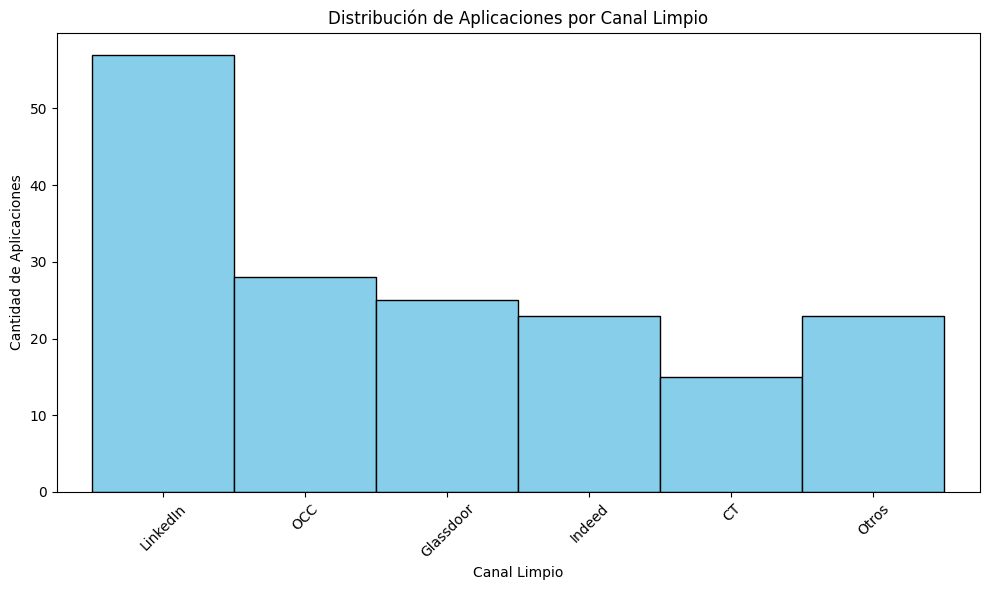

In [21]:
# Cantidad de aplicaciones 
print("Cantidad de aplicaciones:", aplicaciones.shape[0])

#Ordenar los canales para graficar 

counts = aplicaciones['Canal_limpio'].value_counts()

# separar "Otros"
otros = counts[counts.index == 'Otros']
resto = counts[counts.index != 'Otros']

# ordenar el resto por cantidad
resto = resto.sort_values(ascending=False)

# concatenar con "Otros" al final
counts_ordenado = pd.concat([resto, otros])

#Graficar aplicaciones por canal limpio
plt.figure(figsize=(10,6))
counts_ordenado.plot(kind='bar', color='skyblue', edgecolor='black', width=1)
plt.xlabel('Canal Limpio')
plt.ylabel('Cantidad de Aplicaciones')
plt.title('Distribución de Aplicaciones por Canal Limpio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
#Cuantas empresas distintas
print("Cantidad de empresas distintas:", aplicaciones['Empresa'].nunique())

empresas_distintas = aplicaciones['Empresa'].unique()

print('\nLista de empresas distintas:\n')
for e in empresas_distintas: 
    print(e)

Cantidad de empresas distintas: 146

Lista de empresas distintas:

Idis
Amaris
Smilepill
Adam Milo 
Incode
ITJ 
ATOS
Grupo Salinas
Inavant
Grupo Caliente
Encora
Concentrix 
capgemini
Tekton labs
Alten
Packsys
Caliente Casino 
Stefanini Latam
Steris
Sigma 
Flister Reclutamiento Comercial 
Farmacias del ahorro
Best Egg
Lindee
Hone
E contact
Artefact
CLEBER
Rackspace technologies
Constructor
Insight Global
Grupo Ti
Helicon
Informática de América 
Monterrey IT cluster
daltile
improvado 
Remoto workforce
Thermofisher
Nielsen IQ
Randstand
Genestack ltd
UNOSQUARE!!
Hector Sosa
E connect
Sigma
Banregio
Scalepex
IDS comercial 
Mucho Red
grupo ayvi
Invisible
Genestack
Tort Experts
Caterpillar
Improvado
Confidencial 
Sas
ManPowerGroup
Paired
Skydropx
Capgemini
Impulssamex
Tecnoap
caliente casino
wexpand
Lumina Software
Redwood logistics
Dimex 
incFile
Informática Sa de CV
Tecnológico de Monterrey
Avahi
Baufest
Dematic
workspark
Phrac international
ODIX
Braintrust
Dtroy
Envia flores
Fultra
Xploy S

Conclusiones 

1. LinkedIn es la plataforma con mayor uso.

2. 146 empresas han sido contactadas

3. 